In [28]:
import sklearn

import tensorflow as tf
from tensorflow import keras


# 공통 모듈 임포트
import numpy as np
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
!pip install tensorflow-addons
import tqdm
import tensorflow_addons as tfa
tqdm_callback = tfa.callbacks.TQDMProgressBar()

#### MNIST 데이터 로드부터 시작

In [29]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [30]:
X_train_full = X_train_full[..., np.newaxis].astype(np.float32) / 255.
X_test = X_test[..., np.newaxis].astype(np.float32) / 255.
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_new = X_test[:3]

In [31]:
# 간단한 DNN 설계 후 컴파일
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28, 1]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.01),
              metrics=["accuracy"])

In [32]:
# 학습
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks = tqdm_callback)

Training:   0%|           0/10 ETA: ?s,  ?epochs/s

Epoch 1/10


0/1719           ETA: ?s - 

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6793 - accuracy: 0.8246 - val_loss: 0.3707 - val_accuracy: 0.9012
Epoch 2/10


0/1719           ETA: ?s - 

Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3488 - accuracy: 0.9029 - val_loss: 0.2963 - val_accuracy: 0.9194
Epoch 3/10


0/1719           ETA: ?s - 

Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2979 - accuracy: 0.9160 - val_loss: 0.2626 - val_accuracy: 0.9296
Epoch 4/10


0/1719           ETA: ?s - 

Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2678 - accuracy: 0.9243 - val_loss: 0.2414 - val_accuracy: 0.9334
Epoch 5/10


0/1719           ETA: ?s - 

Epoch 5/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2461 - accuracy: 0.9310 - val_loss: 0.2237 - val_accuracy: 0.9392
Epoch 6/10


0/1719           ETA: ?s - 

Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2283 - accuracy: 0.9355 - val_loss: 0.2085 - val_accuracy: 0.9428
Epoch 7/10


0/1719           ETA: ?s - 

Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2134 - accuracy: 0.9401 - val_loss: 0.1960 - val_accuracy: 0.9466
Epoch 8/10


0/1719           ETA: ?s - 

Epoch 8/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2008 - accuracy: 0.9438 - val_loss: 0.1868 - val_accuracy: 0.9506
Epoch 9/10


0/1719           ETA: ?s - 

Epoch 9/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1899 - accuracy: 0.9465 - val_loss: 0.1762 - val_accuracy: 0.9524
Epoch 10/10


0/1719           ETA: ?s - 

Epoch 10/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1798 - accuracy: 0.9500 - val_loss: 0.1708 - val_accuracy: 0.9536


In [33]:
# 예측
np.round(model.predict(X_new), 2)

1/1 [==============================] - 0s 48ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.99, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.98, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [34]:
# 버전 획득, 기타 정의
model_version, model_name = "0001", "my_mnist_model"
model_path = os.path.join(model_name, model_version)

In [35]:
!rm -rf {model_name}

In [36]:
# pb 확장자로 저장
tf.saved_model.save(model, model_path)

In [10]:
# 코랩에서의 경로 잠깐 확인
for root, dirs, files in os.walk(model_name):
    indent = '    ' * root.count(os.sep)
    print('{}{}/'.format(indent, os.path.basename(root)))
    for filename in files:
        print('{}{}'.format(indent + '    ', filename))

my_mnist_model/
    0001/
        fingerprint.pb
        saved_model.pb
        variables/
            variables.data-00000-of-00001
            variables.index
        assets/


### saved_model_cli 커맨드 도구 사용

In [11]:
!saved_model_cli show --dir {model_path}

2023-07-09 05:07:45.486158: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
The given SavedModel contains the following tag-sets:
'serve'


In [12]:
# 모델 info
!saved_model_cli show --dir {model_path} --tag_set serve \
                      --signature_def serving_default

2023-07-09 05:07:50.870056: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
The given SavedModel SignatureDef contains the following input(s):
  inputs['flatten_input'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 28, 28, 1)
      name: serving_default_flatten_input:0
The given SavedModel SignatureDef contains the following output(s):
  outputs['dense_1'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 10)
      name: StatefulPartitionedCall:0
Method name is: tensorflow/serving/predict


In [13]:
# 전체 정보
!saved_model_cli show --dir {model_path} --all

2023-07-09 05:07:54.744572: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['flatten_input'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 28, 28, 1)
        name: serving_default_flatten_input:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['dense_1'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 10)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow/serving/pre

In [14]:
# npy 파일로 저장
np.save("my_mnist_tests.h5", X_new)

In [15]:
input_name = model.input_names[0]
# npy파일을 사용한 예측값
!saved_model_cli run --dir {model_path} --tag_set serve \
                     --signature_def serving_default    \
                     --inputs {input_name}=my_mnist_tests.npy

2023-07-09 05:08:00.691469: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Traceback (most recent call last):
  File "/usr/local/bin/saved_model_cli", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/tools/saved_model_cli.py", line 1284, in main
    app.run(smcli_main)
  File "/usr/local/lib/python3.10/dist-packages/absl/app.py", line 308, in run
    _run_main(main, args)
  File "/usr/local/lib/python3.10/dist-packages/absl/app.py", line 254, in _run_main
    sys.exit(main(argv))
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/tools/saved_model_cli.py", line 1282, in smcli_main
    args.func()
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/tools/saved_model_cli.py", line 976, in run
    tensor_key_feed_dict = load_inputs_from_input_arg_string(
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/tools/saved_model_cli.py", line 891,

In [16]:
import zipfile
import os

folder_path = '/content/my_mnist_model'
zip_path = '/content/my_mnist_model.zip'

with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), folder_path))


In [40]:

os.environ["MODEL_DIR"] = os.path.split(os.path.abspath(model_path))[0]

In [41]:
%%bash --bg
nohup tensorflow_model_server \
     --rest_api_port=8501 \
     --model_name=my_mnist_model \
     --model_base_path="${MODEL_DIR}" >server.log 2>&1

In [19]:
# cmder 사용-  도커로 실행중


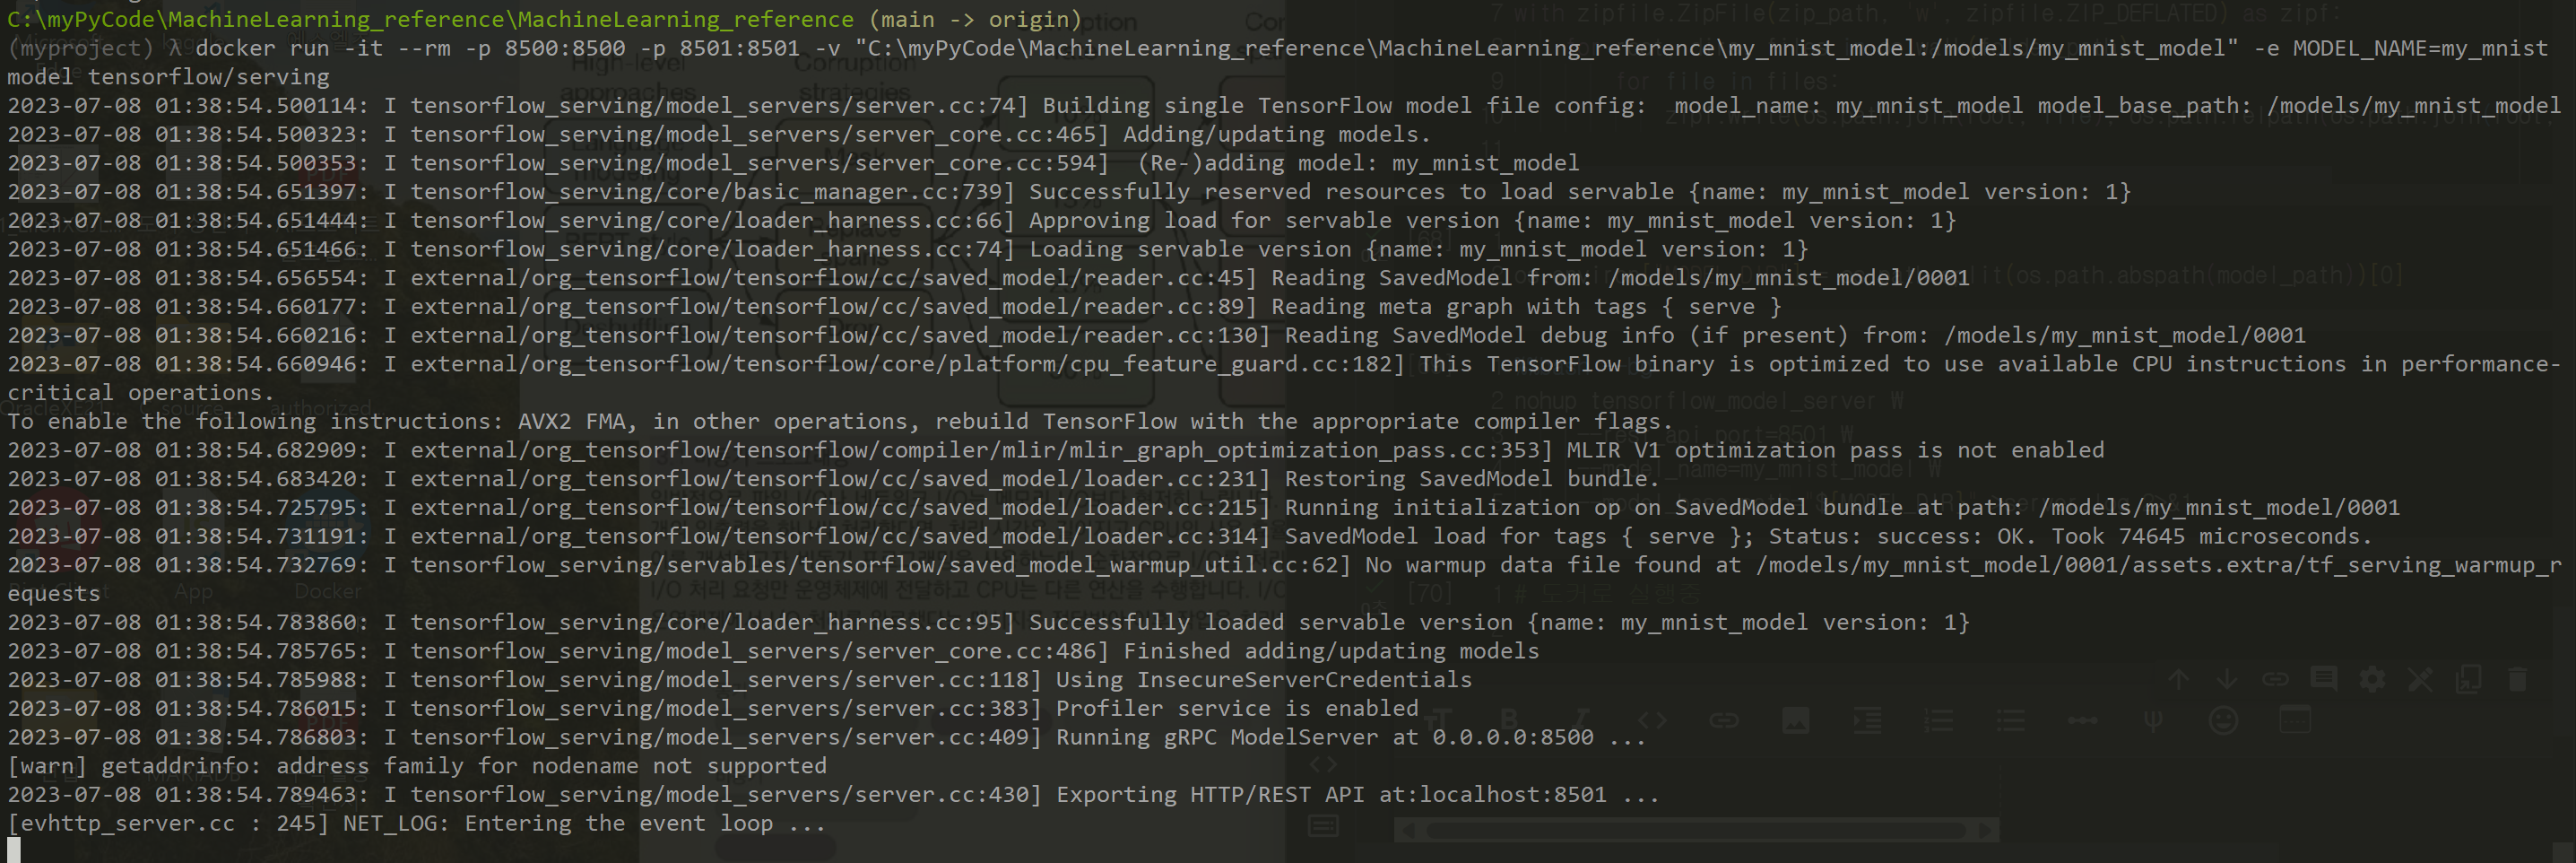

In [42]:
!tail server.log

nohup: failed to run command 'tensorflow_model_server': No such file or directory


#### REST API로 TF 서빙 시작

In [43]:
import json

input_data_json = json.dumps({
    "signature_name": "serving_default",
    "instances": X_new.tolist(),
})

In [44]:
repr(input_data_json)[:1500] + "..."

'\'{"signature_name": "serving_default", "instances": [[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0

In [ ]:
# 예측을 기다리는 중
import requests

SERVER_URL = 'http://localhost:8501/v1/models/my_mnist_model:predict'
response = requests.post(SERVER_URL, data=input_data_json)
response.raise_for_status() # raise an exception in case of error
response = response.json()

In [ ]:
response.keys()

In [ ]:
# 예측값
y_proba = np.array(response["predictions"])
y_proba.round(2)

#### GRPC API

In [ ]:
from tensorflow_serving.apis.predict_pb2 import PredictRequest
# 과정은 유사
# request 정의
request = PredictRequest()
request.model_spec.name = model_name
request.model_spec.signature_name = "serving_default"
input_name = model.input_names[0]
request.inputs[input_name].CopyFrom(tf.make_tensor_proto(X_new))

In [ ]:
# grpc
# 로컬 서버 포트 8500으로 요청 타임아웃 9초
# 보안x
import grpc
from tensorflow_serving.apis import prediction_service_pb2_grpc
channel = grpc.insecure_channel('localhost:8500')
predict_service = prediction_service_pb2_grpc.PredictionServiceStub(channel)
response = predict_service.Predict(request, timeout = 9)

In [ ]:
# 요청 호출
response

In [ ]:
# 텐서로 요청 변환
output_name = model.output_names[0]
outputs_proto = response.outputs[output_name]
y_proba = tf.make_ndarray(outputs_proto)
y_proba.round(2)

#### 모델 2

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28, 1]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate = 1),
              metrics=["accuracy"])

In [ ]:
# 모델 학습 30
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks = tqdm_callback)

In [ ]:
# loss 그래프 시각화
def plot_learning_curves(loss, accuracy):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(accuracy)) + 1, accuracy, "r.-", label="accuracy")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 30, 0, 3])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
plot_learning_curves(history.history["loss"], history.history["accuracy"])
plt.title("DNN_sparse_categorical_crossentropy_Adam")
plt.show()

In [ ]:
# 두번째 모델 추가
# 버전 획득, 기타 정의
model_version, model_name = "0002", "my_mnist_model"
model_path = os.path.join(model_name, model_version)

In [ ]:
# 모델 저장
tf.saved_model.save(model, model_path)

In [ ]:
# colab 저장 경로
for root, dirs, files in os.walk(model_name):
    indent = '    ' * root.count(os.sep)
    print('{}{}/'.format(indent, os.path.basename(root)))
    for filename in files:
        print('{}{}'.format(indent + '    ', filename))

In [ ]:
import zipfile
import os

folder_path = '/content/my_mnist_model'
zip_path = '/content/my_mnist_model.zip'

with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), folder_path))


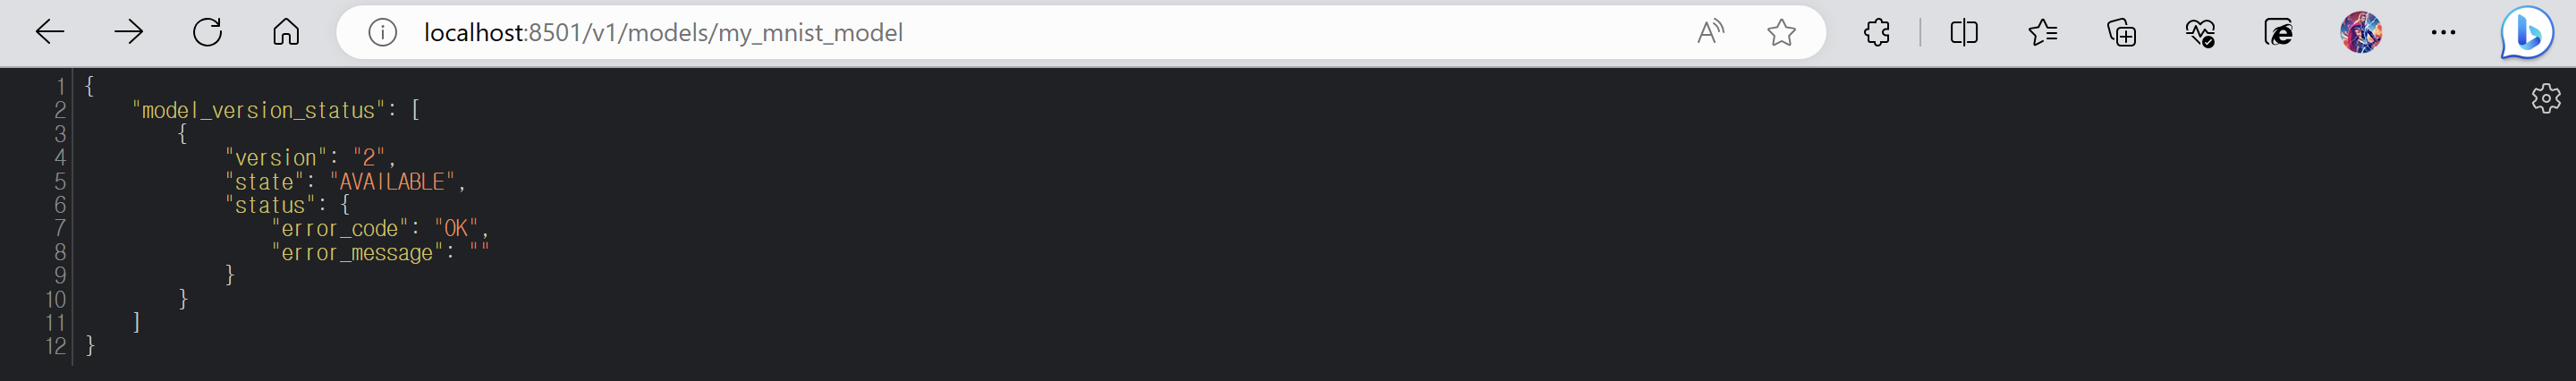

In [ ]:
import json

input_data_json = json.dumps({
    "signature_name": "serving_default",
    "instances": X_new.tolist(),
})

In [ ]:
# 예측을 기다리는 중
import requests

SERVER_URL = 'http://localhost:8501/v1/models/my_mnist_model:predict'
response = requests.post(SERVER_URL, data=input_data_json)
response.raise_for_status() # raise an exception in case of error
response = response.json()

In [ ]:
response.keys()

In [ ]:
y_proba = np.array(response["predictions"])
y_proba.round(2)

### GCS AI 플랫폼 사용

In [24]:
project_id = "chaewon-mnist"
import os
# 실제 프로젝트 아이디 개설

In [25]:
# 암호화
import googleapiclient.discovery
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "my_service_account_private_key.json"
model_id = "chaewon_mnist_model"
model_path = "projects/{}/models/{}".format(project_id, model_id)
model_path += "/versions/v0002/"
ml_resource = googleapiclient.discovery.build("ml", "v1").projects()

In [26]:
def predict(X):
    input_data_json = {"signature_name":"serving_default",
                       "instances": X.tolist()}
    request = ml_resource.predict(name = model_path, body = input_data_json)
    response = request.execute()
    if "error" in response:
        raise RuntimeError(response["error"])
    return np.array([pred[output_name] for pred in response["predictions"]])

In [ ]:
Y_probas = predict(X_new)
np.round(Y_probas, 2)